# Perceptron


load data set

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Labels: ',np.unique(y))

Labels:  [0 1 2]


Split data set


In [2]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3,
                                          random_state=1, stratify=y)
print('Labels in y: ',np.bincount(y))
print('labels in y train: ',np.bincount(y_tr) )
print('labels in y test: ',np.bincount(y_ts) )


Labels in y:  [50 50 50]
labels in y train:  [35 35 35]
labels in y test:  [15 15 15]


Preprocess and scale


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_tr)# estimate mu and sigma

# apply standardization
X_tr_std = sc.transform(X_tr)
X_ts_std = sc.transform(X_ts)

One versus Rest OvR, train perceptron

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_tr_std, y_tr)

Perceptron(eta0=0.1, random_state=1)

Predict

In [5]:
y_pred = ppn.predict(X_ts_std)
print(f' Wrongly classified: {(y_ts != y_pred).sum()}')

 Wrongly classified: 1


Metrics

In [6]:
from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_ts, y_pred)}')

Accuracy:0.9777777777777777


Each classifier in sklearn has an analogous method score()

In [7]:
print(f'Accuracy:{ppn.score(X_ts_std, y_ts)}')

Accuracy:0.9777777777777777


Plot decision regions


In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution = 0.02):
    markers = ('s', 'x', 'o', '4', '4')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # show the decision region
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # display by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl, 0],
                    y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label =cl)
        
    if test_idx:
        X_ts, y_ts = X[test_idx,:], y[test_idx]
        plt.scatter( X_ts[:,0],  X_ts[:,1],c='w',
                   edgecolor='k', alpha=1.0,linewidth=1, marker='o',
                   s=100, label='Test set')

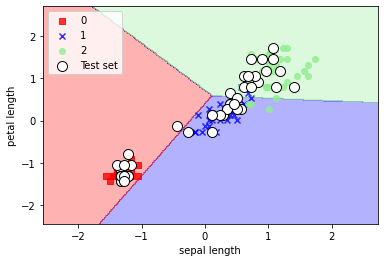

In [23]:
X_comb_std = np.vstack((X_tr_std, X_ts_std))
y_comb_std = np.hstack((y_tr, y_ts))

plot_decision_regions(X=X_comb_std, y=y_comb_std,
                      classifier=ppn, test_idx=range(105,150))
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()